In [5]:
import numpy as np
import copy
import matplotlib.pyplot as plt

n_dim = 1000
n_task = 10

# task frequency p_k ~ k^(-alpha)
alpha = 2 
prob = 1/(np.arange(n_task) + 1)**(alpha)
prob /= np.sum(prob)

loss_fn_name = 'mse' # 'mse' (mean squared error) or 'ce' (cross entropy)
N0 = 0.003 # wasted resources
C = np.eye(n_task, n_task) + 0.0 * np.random.randn(n_task, n_task) # correlation matrix

learning_rate = 3e-4
lr_eff = learning_rate * np.sqrt(n_dim) * 2
n_steps = 1000

ls = []
losses = []

if loss_fn_name == 'mse':
    
    l = np.ones(n_task,) # loss are initialized to be one for all 
    
    for i in range(n_steps):
        competitivenss = prob * l
        resource = (C @ competitivenss[:,None])[:,0]/(np.sum(competitivenss) + N0)
        l -= lr_eff * resource
        l = np.maximum(l, 0.)
        ls.append(copy.deepcopy(l))
        
        loss = np.sum(prob * l**2)
        losses.append(loss)
        
    skill_level = 1 - np.array(ls)
    
elif loss_fn_name == 'ce':
    
    l = np.zeros(n_task,) # skill levels are initialized to be zero for all 
    
    def sigmoid(x):
        return 1/(1+np.exp(-x))
    
    for i in range(n_steps):
        competitivenss = prob * np.exp(-l)/(1+np.exp(-l))
        resource = (C @ competitivenss[:,None])[:,0]/(np.sum(competitivenss) + N0)
        l += lr_eff * resource
        ls.append(copy.deepcopy(l))

        loss = np.sum(prob * np.log(1+np.exp(-l)))
        losses.append(loss)
    
    skill_level = sigmoid(np.array(ls))


Text(0, 0.5, 'skill level')

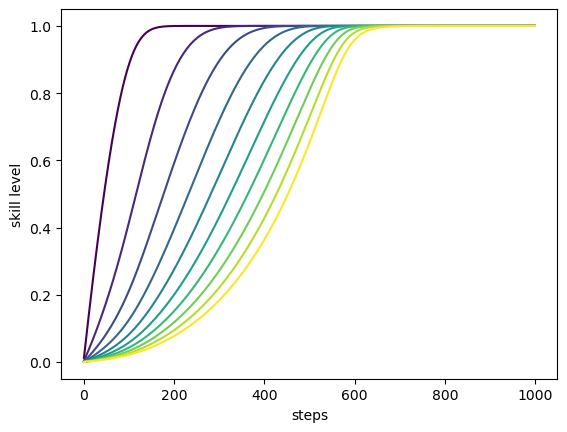

In [9]:
cmap = plt.get_cmap('viridis') 


for i in range(n_task):
    plt.plot(skill_level[:,i], color=cmap(i/(n_task-1)))
    
plt.xlabel('steps')
plt.ylabel('skill level')


Text(0, 0.5, 'loss')

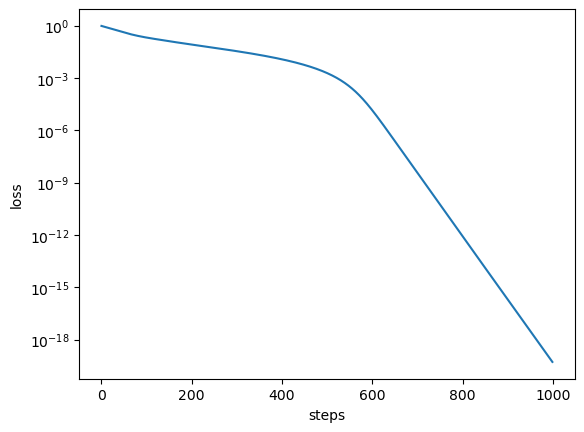

In [10]:
plt.plot(losses)
plt.yscale('log')

plt.xlabel('steps')
plt.ylabel('loss')